#Time Serie Analysis


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests

# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
# from statsmodels.graphics.tsaplots import plot_pacf
# from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline


In [2]:
weather = pd.read_csv('weatherstats_calgary_normal_monthly.csv', header=0, na_values='NaN')
weather

,date,max_dew_point_v,max_dew_point_s,max_dew_point_c,max_dew_point_d,max_relative_humidity_v,max_relative_humidity_s,max_relative_humidity_c,max_relative_humidity_d,max_temperature_v,...,snow_c,snow_d,snow_on_ground_v,snow_on_ground_s,snow_on_ground_c,snow_on_ground_d,solar_radiation_v,solar_radiation_s,solar_radiation_c,solar_radiation_d
0,2023-03-01,-5.62,2.26,30.0,1993-03-01 2022-03-01,81.82,4.11,30.0,1993-03-01 2022-03-01,3.96,...,30,1993-03-01 2022-03-01,3.1,2.98,30.0,1993-03-01 2022-03-01,NaN,NaN,NaN,NaN
1,2023-02-01,-9.17,3.44,30.0,1993-02-01 2022-02-01,79.62,4.71,30.0,1993-02-01 2022-02-01,-0.55,...,30,1993-02-01 2022-02-01,4.4,3.37,30.0,1993-02-01 2022-02-01,NaN,NaN,NaN,NaN
2,2023-01-01,-9.55,2.78,30.0,1993-01-01 2022-01-01,78.81,3.57,30.0,1993-01-01 2022-01-01,-1.17,...,30,1993-01-01 2022-01-01,5.4,4.53,30.0,1993-01-01 2022-01-01,NaN,NaN,NaN,NaN
3,2022-12-01,-9.31,2.92,30.0,1992-12-01 2021-12-01,79.79,4.96,30.0,1992-12-01 2021-12-01,-1.07,...,30,1992-12-01 2021-12-01,5.0,4.79,30.0,1992-12-01 2021-12-01,NaN,NaN,NaN,NaN
4,2022-11-01,-5.24,2.00,30.0,1992-11-01 2021-11-01,81.61,3.88,30.0,1992-11-01 2021-11-01,3.87,...,30,1992-11-01 2021-11-01,2.4,2.11,30.0,1992-11-01 2021-11-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1940-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.70,...,30,1910-04-01 1939-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,1940-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.59,...,30,1910-03-01 1939-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,1940-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.62,...,30,1910-02-01 1939-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,1940-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.59,...,30,1910-01-01 1939-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.columns

Index(['date', 'max_dew_point_v', 'max_dew_point_s', 'max_dew_point_c',
       'max_dew_point_d', 'max_relative_humidity_v', 'max_relative_humidity_s',
       'max_relative_humidity_c', 'max_relative_humidity_d',
       'max_temperature_v', 'max_temperature_s', 'max_temperature_c',
       'max_temperature_d', 'max_wind_speed_v', 'max_wind_speed_s',
       'max_wind_speed_c', 'max_wind_speed_d', 'min_dew_point_v',
       'min_dew_point_s', 'min_dew_point_c', 'min_dew_point_d',
       'min_relative_humidity_v', 'min_relative_humidity_s',
       'min_relative_humidity_c', 'min_relative_humidity_d',
       'min_temperature_v', 'min_temperature_s', 'min_temperature_c',
       'min_temperature_d', 'min_wind_speed_v', 'min_wind_speed_s',
       'min_wind_speed_c', 'min_wind_speed_d', 'precipitation_v',
       'precipitation_s', 'precipitation_c', 'precipitation_d', 'rain_v',
       'rain_s', 'rain_c', 'rain_d', 'snow_v', 'snow_s', 'snow_c', 'snow_d',
       'snow_on_ground_v', 'snow_on_ground

In [4]:
max_temp=weather.loc[:300,['date','max_temperature_v']]
max_temp

,date,max_temperature_v
0,2023-03-01,3.96
1,2023-02-01,-0.55
2,2023-01-01,-1.17
3,2022-12-01,-1.07
4,2022-11-01,3.87
...,...,...
296,1998-07-01,22.86
297,1998-06-01,20.42
298,1998-05-01,16.38
299,1998-04-01,11.09


In [5]:
max_temp[max_temp['max_temperature_v'].isna()]

,date,max_temperature_v


## The run sequence plot

<Figure size 1000x2000 with 0 Axes>

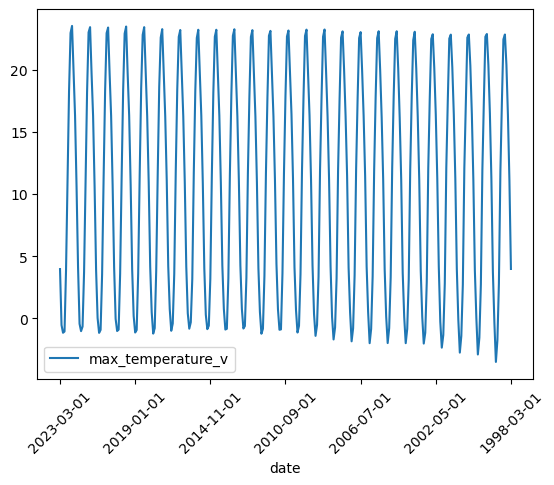

In [6]:
plt.figure(figsize=(10,20))
max_temp.plot(x="date", y="max_temperature_v")
plt.xticks(rotation=45)
plt.show()

## Split date into year and month

In [7]:
max_temp['date'] = pd.to_datetime(max_temp['date']) ## converting 'date' column's type to date from string
max_temp['year'] = max_temp['date'].dt.year
max_temp['month'] = max_temp['date'].dt.month
max_temp.head()

,date,max_temperature_v,year,month
0,2023-03-01,3.96,2023,3
1,2023-02-01,-0.55,2023,2
2,2023-01-01,-1.17,2023,1
3,2022-12-01,-1.07,2022,12
4,2022-11-01,3.87,2022,11


## Seasonal plot and box plot

Text(0, 0.5, 'max_temperature')

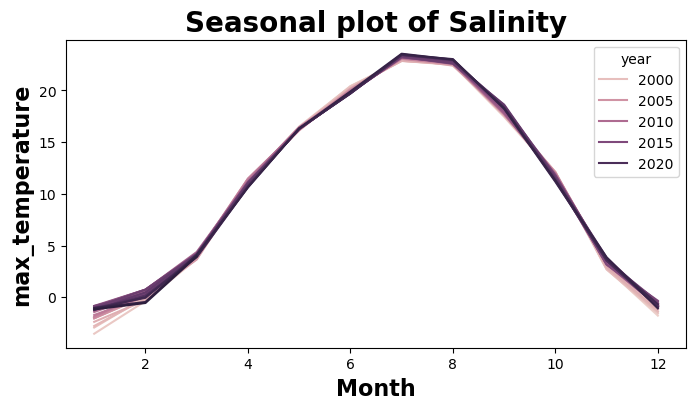

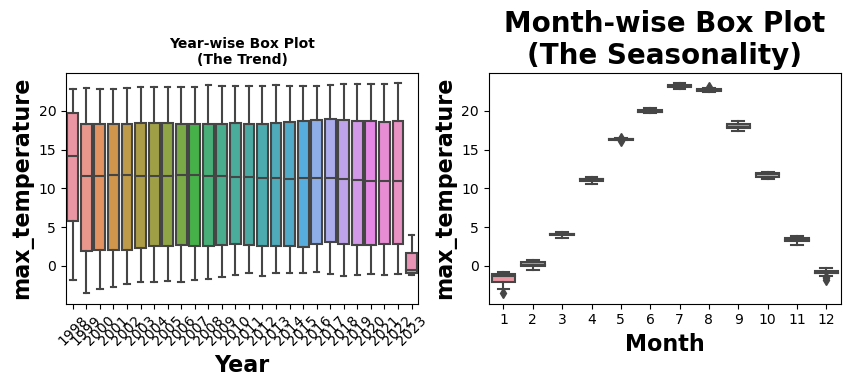

In [8]:
fig, ax = plt.subplots(figsize=(8, 4))

sns.lineplot(max_temp, x='month', y='max_temperature_v', hue=max_temp['year'])
ax.set_title('Seasonal plot of Salinity', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax.set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax.set_ylabel('max_temperature', fontsize = 16, fontdict=dict(weight='bold'))

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

sns.boxplot(max_temp, x='year', y='max_temperature_v', ax=ax[0])
ax[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize = 10, loc='center', fontdict=dict(weight='bold'))
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('Year', fontsize = 16, fontdict=dict(weight='bold'))
ax[0].set_ylabel('max_temperature', fontsize = 16, fontdict=dict(weight='bold'))

sns.boxplot(max_temp, x='month', y='max_temperature_v', ax=ax[1])
ax[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize = 20, loc='center', fontdict=dict(weight='bold'))
ax[1].set_xlabel('Month', fontsize = 16, fontdict=dict(weight='bold'))
ax[1].set_ylabel('max_temperature', fontsize = 16, fontdict=dict(weight='bold'))


## ACF and PACF plots
The autocorrelation function (ACF) and partial autocorrelation function (PACF) in conjunction is necessary for selecting the appropriate model for any time series prediction.

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [13]:
import statsmodels.api as sm
sm.tsa.acf(max_temp["max_temperature_v"])

array([ 1.00000000e+00,  8.58227093e-01,  4.90997818e-01, -1.32010888e-03,
       -4.88915706e-01, -8.41303497e-01, -9.65069842e-01, -8.37371056e-01,
       -4.85774532e-01, -7.14172493e-03,  4.71297814e-01,  8.24510833e-01,
        9.57767356e-01,  8.22379064e-01,  4.71126131e-01,  1.49746282e-04,
       -4.66813245e-01, -8.04635640e-01, -9.23667659e-01, -8.02042610e-01,
       -4.65961696e-01, -8.12862617e-03,  4.49764360e-01,  7.88359680e-01,
        9.16291895e-01])

We can also specify the number of lags to use with the nlags argument:

In [14]:
sm.tsa.acf(max_temp["max_temperature_v"], nlags=5)

array([ 1.        ,  0.85822709,  0.49099782, -0.00132011, -0.48891571,
       -0.8413035 ])

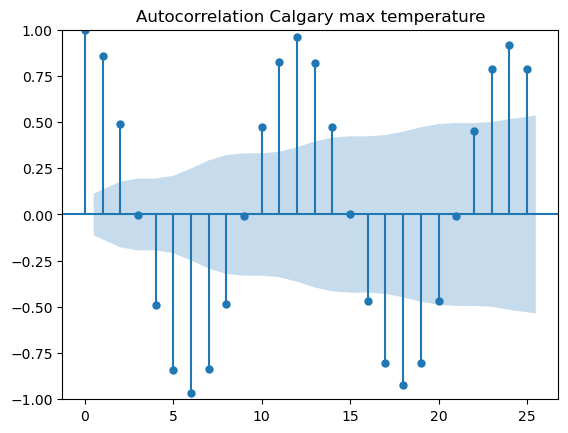

In [15]:
#The x-axis displays the number of lags and the y-axis displays the autocorrelation at that number of lags.
plot_acf(max_temp["max_temperature_v"],title='Autocorrelation Calgary max temperature')
plt.show()

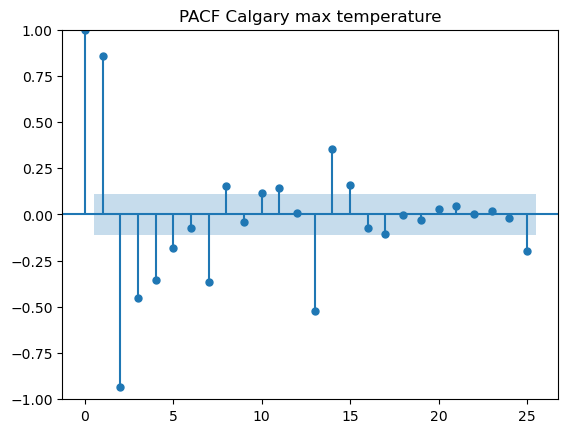

In [16]:
plot_pacf(max_temp["max_temperature_v"],title='PACF Calgary max temperature')
plt.show()

 correlations vanishes with lag. We will focus on the points that lie beyond the blue region as they signify strong statistical significance.
 We can look at the trend and seasonality separately to dive deep into the data.


If the time series is stationary, the ACF/PACF plots will show a quick cut off after a small number of lags .We don’t see that phenomenon here so we have somewhat an intuition that this series is not stationary.


The following earthquake data set is used to show you how PACF and ACF plots would look like for stationary data:

In [17]:
quake = pd.read_csv('EarthQuake.csv', header=0, na_values='NaN')
quake.head()

,Year,Quakes
0,1916,2
1,1917,5
2,1918,12
3,1919,8
4,1920,7


In [18]:
sm.tsa.acf(quake["Quakes"])

array([ 1.        ,  0.24867124,  0.17116089,  0.29780757,  0.19623469,
        0.15932599,  0.13348842,  0.12595819,  0.13757438, -0.04631116,
       -0.01195017, -0.0442581 , -0.00570743,  0.07082071,  0.0415762 ,
       -0.00221394, -0.00124091, -0.11135647, -0.04986952,  0.05941587,
        0.07331272])

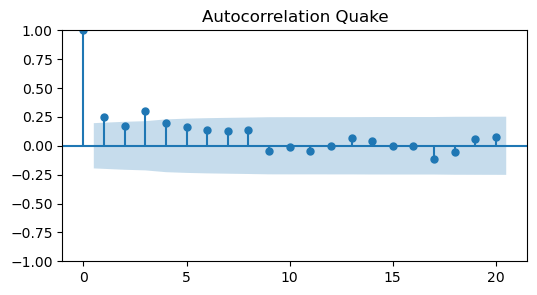

In [19]:
fig, ax = plt.subplots(figsize=(6, 3))
plot_acf(quake["Quakes"],title='Autocorrelation Quake', ax=ax )
plt.show()

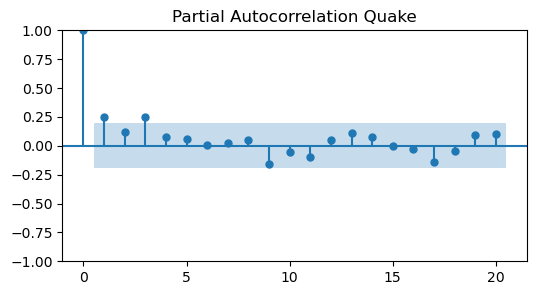

In [20]:
fig, ax = plt.subplots(figsize=(6, 3))
plot_pacf(quake["Quakes"],title='Partial Autocorrelation Quake',ax=ax)
plt.show()

## Back to wather data: Stationarity Check
Time series with trends, or with seasonality, are not stationary — the trend and seasonality will affect the value of the time series at different times. We can use Dickey–Fuller test for staionary.
1. If the p-value is lower than the threshold value (5% or 1%), we reject the null hypothesis and time series is stationary.
2. If the p-value is higher than the threshold, we fail to reject the null hypothesis and time series is non-stationary.



In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
result = adfuller(max_temp["max_temperature_v"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.612327
p-value: 0.987916
Critical Test Statistics Values:
	1%: -3.453
	5%: -2.872
	10%: -2.572


## Time Series Components
When we decompose a time series into components, we usually combine the trend and cycle into a single trend-cycle component (sometimes called the trend for simplicity). Thus we think of a time series comprising three components: a trend-cycle component, a seasonal component, and a remainder component (containing anything else in the time series).

Text(0.5, 0.98, 'Temperature Decomposition')

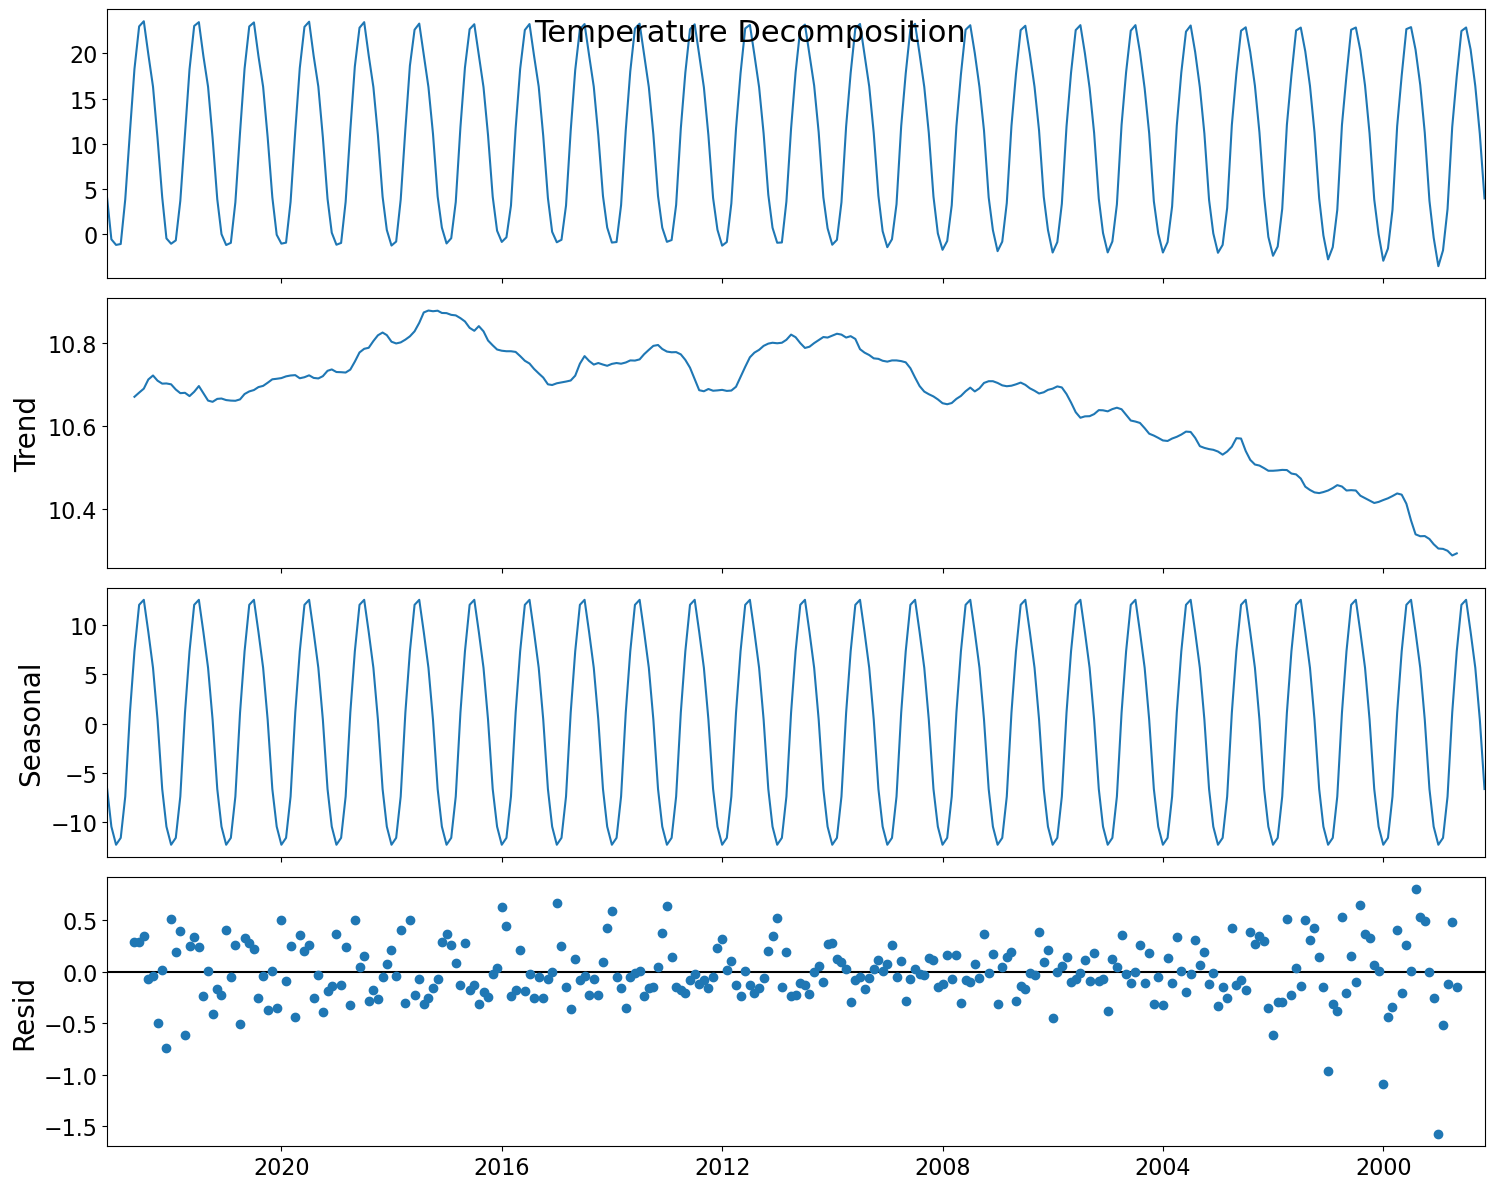

In [23]:
y = max_temp[['date','max_temperature_v']]
y = y.set_index('date')
from pylab import rcParams
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 20
rcParams['ytick.labelsize'] = 16
rcParams['xtick.labelsize'] = 16
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomp = decomposition.plot()
decomp.suptitle('Temperature Decomposition', fontsize=22)

##Detrend by Differencing
1. Differencing is one of the most important strategies to make a time series stationary
2. Differencing can help stabilize the mean of the time series by removing changes in the level of a time series, and so eliminating (or reducing) trend and seasonality.

$$y_t'=y_t -y_{t-1}$$
1st order Differentiation
Differencing says instead of predicting yt directly try to predict the gap between $y_t$ and $y_{t-1}$, because we can predict $y_t'$, we can then reconstruct $y_t$ by $$y_t=y_t'+y_{t-1}$$

* **Lag Difference:** the difference between consecutive observations is called a lag-1 difference. For time series with a seasonal component, the lag may be expected to be the period (width) of the seasonality.
* **Difference Order**: The number of times that differencing is performed is called the difference order. The process of differencing can be repeated more than once until all temporal dependence has been removed.

Lets begin to make it stationary through differencing{ for non-seasonal diff() & seasonal differencing diff(12)}




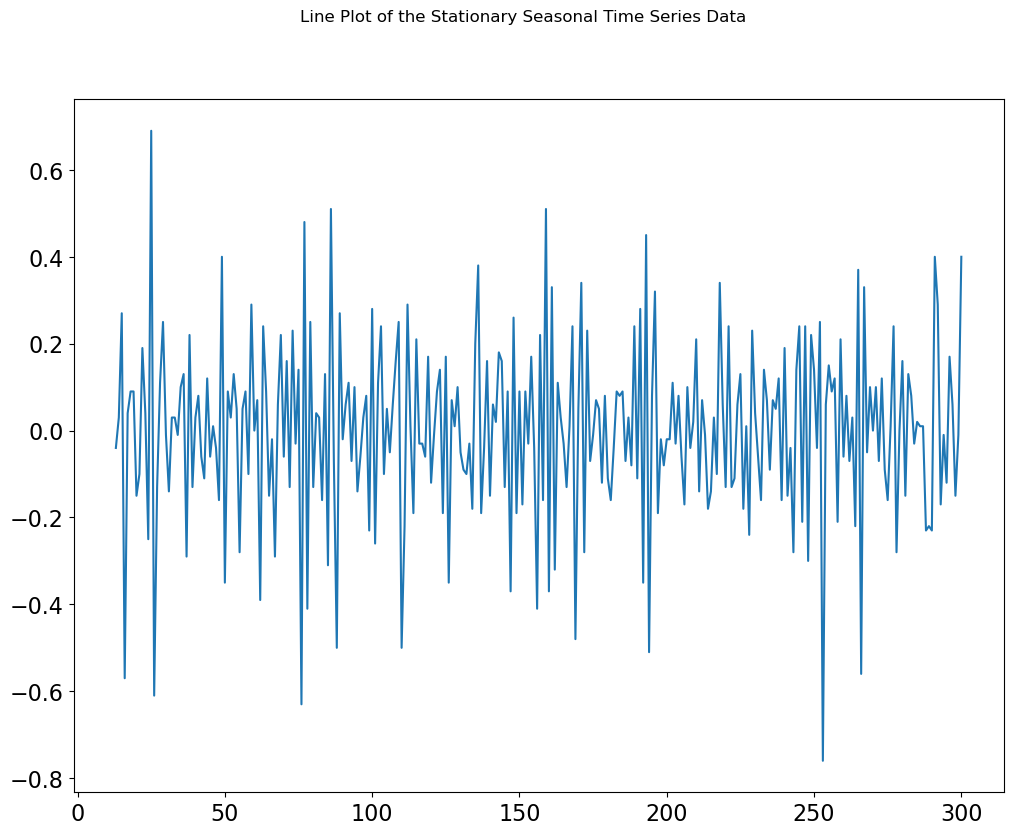

In [25]:
max_temp_diff = max_temp["max_temperature_v"].diff().diff(12)
max_temp_diff.dropna(inplace=True)

# Plot differenced data
fig, ax = plt.subplots(figsize=(12,9))
fig.suptitle('Line Plot of the Stationary Seasonal Time Series Data')
max_temp_diff.plot(ax=ax)
plt.show()

On running the Dickey Fuller test again we see that the p value has dropped thus confirming stationary

In [26]:
result = adfuller(max_temp_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Test Statistics Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.092287
p-value: 0.000000
Critical Test Statistics Values:
	1%: -3.454
	5%: -2.872
	10%: -2.572


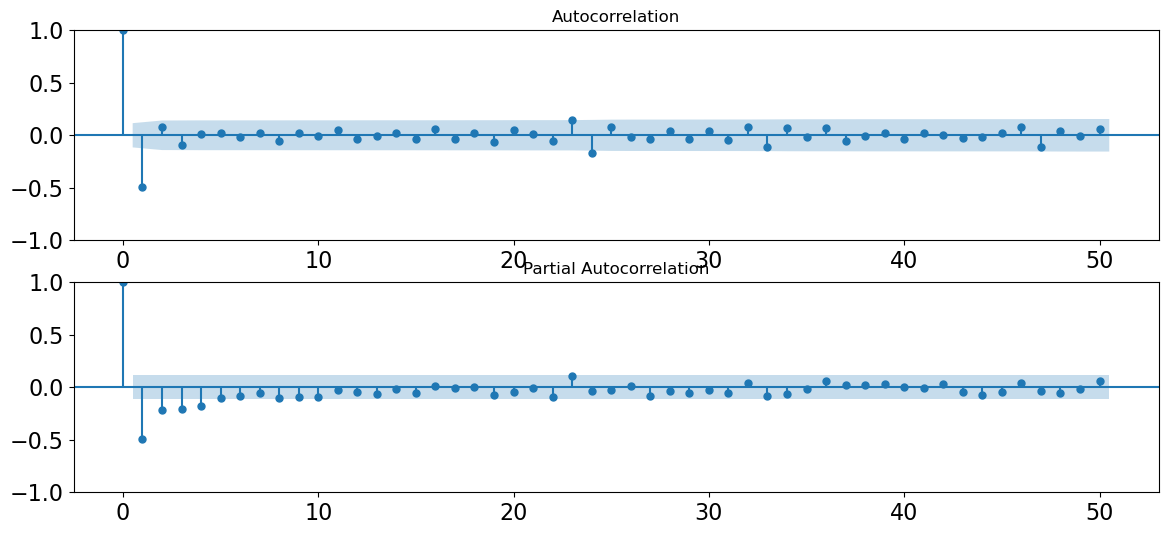

In [28]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(14,6), sharex=False, sharey=False)
ax1 = plot_acf(max_temp_diff, lags=50, ax=ax1)
ax2 = plot_pacf(max_temp_diff, lags=50, ax=ax2)
plt.show()

##Detrend by Model Fitting


##Use Power Transforms for Time Series

# TSA models

The next task is to estimate the model parameters.
ARIMA models are denoted with the order of ARIMA(p,d,q)
1. AR(p) is a regression model that utilizes the dependent relationship between an observation and some number of lagged observations.
2. I(d) is the differencing order to make time series stationary.
3. MA(q) is a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.


In a nutshell, ARIMA is:
P, q, d are hyper-parameters,
ARIMA(p, q, d) is a linear regression model on previous p values and previous q errors post differencing d times,
Also know as the Box-Jenkins model(1976).


Seasonal ARIMA (SARIMA) on the other hand is denoted as (p, d, q)(P, D, Q)m where (P, D, Q)m are the additional set of parameters that specifically describe the seasonal components of the model. P, D, and Q represent the seasonal regression, differencing, and moving average coefficients, and m represents the number of data points in each seasonal cycle.

Pmdarima‘s auto_arima function helps us identify the most optimal p,d,q parameters and return a fitted ARIMA model


https://alkaline-ml.com/pmdarima/modules/classes.html#

In [51]:
#pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 939.4 kB/s eta 0:00:01
   ----------------- ---------------------- 276.5/614.7 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 3.2 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [52]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [53]:
model = pm.auto_arima(max_temp["max_temperature_v"], d=1, D=1,seasonal=True, m=12, trend='c',start_p=0, start_q=0, max_order=6, test='adf', stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-88.204, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-89.552, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-166.868, Time=0.91 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-168.681, Time=0.24 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-166.942, Time=0.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=-166.127, Time=1.93 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=-181.928, Time=0.42 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-179.948, Time=1.49 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=-179.955, Time=0.84 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=-178.421, Time=2.41 sec
 ARIMA(3,1,0)(0,1,0)[12]             : AIC=-193.531, Time=0.59 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=-191.531, Time=1.48 sec
 ARIMA(3,1,0)(0,1,1)[12]             : AIC=-191.531, Time=1.52 sec
 ARIMA(3,1,0)(1,1,1)[12]  

The desired result is to find the lowest possible AIC, which indicates the best balance of model fit with generalizability

split the dataset into a train and test set. when it comes to seasonal data let's create a SARIMA model

<Axes: >

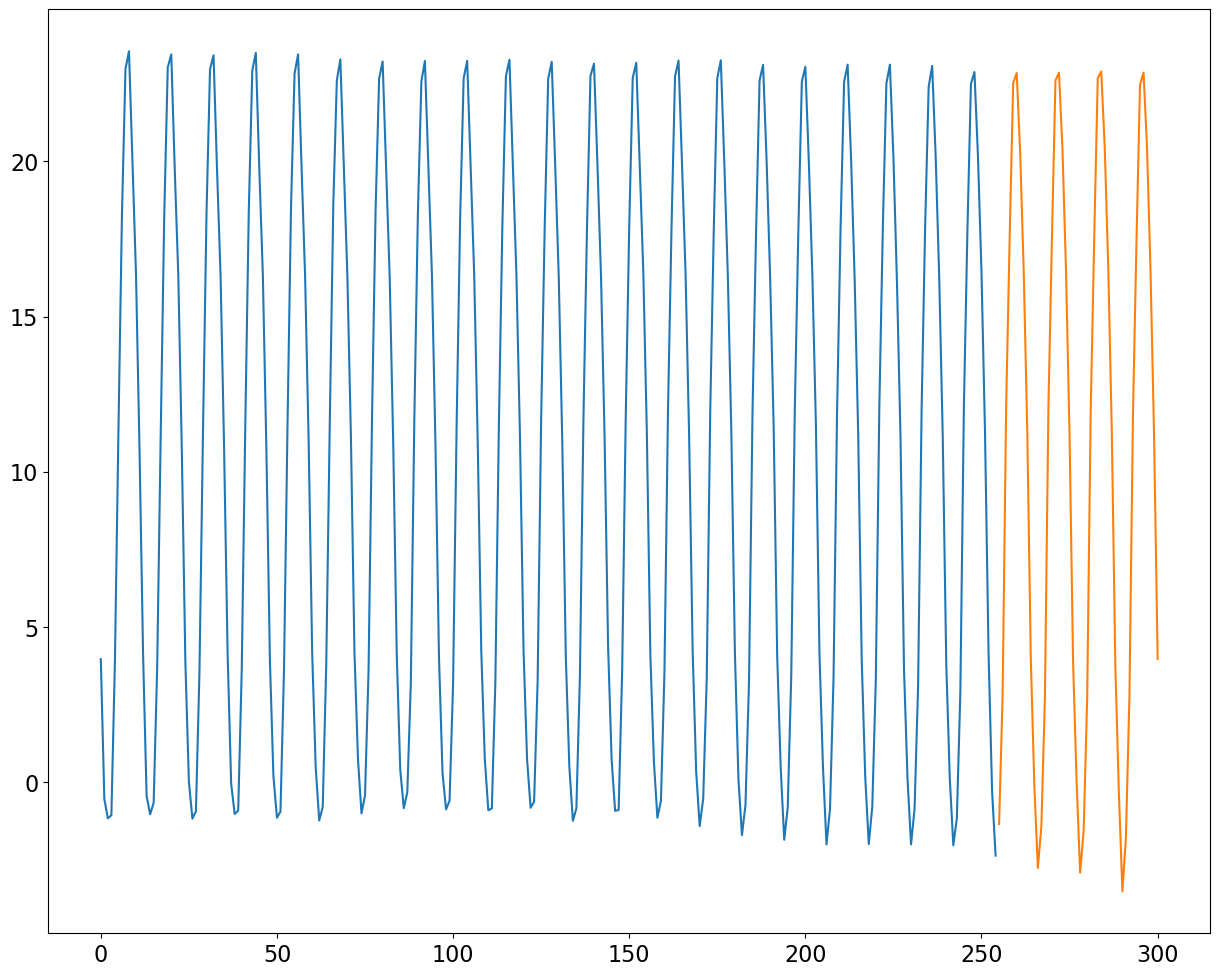

In [54]:
#divide into train and validation set
train = max_temp[:int(0.85*(len(max_temp)))]
test = max_temp[int(0.85*(len(max_temp))):]

#plotting the data

train['max_temperature_v'].plot()
test['max_temperature_v'].plot()

In [55]:
from datetime import datetime
from email.message import EmailMessage
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX



In [56]:
model = SARIMAX(train['max_temperature_v'],order=(4,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
print("Results of SARIMAX on train")
print(results.summary())

Results of SARIMAX on train
                                     SARIMAX Results                                      
Dep. Variable:                  max_temperature_v   No. Observations:                  255
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 103.960
Date:                            Mon, 01 Apr 2024   AIC                           -193.921
Time:                                    11:42:27   BIC                           -169.498
Sample:                                         0   HQIC                          -184.083
                                            - 255                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1200      0.056      2.134      0.033       0.010       0.230
ar.L2  

## Validation


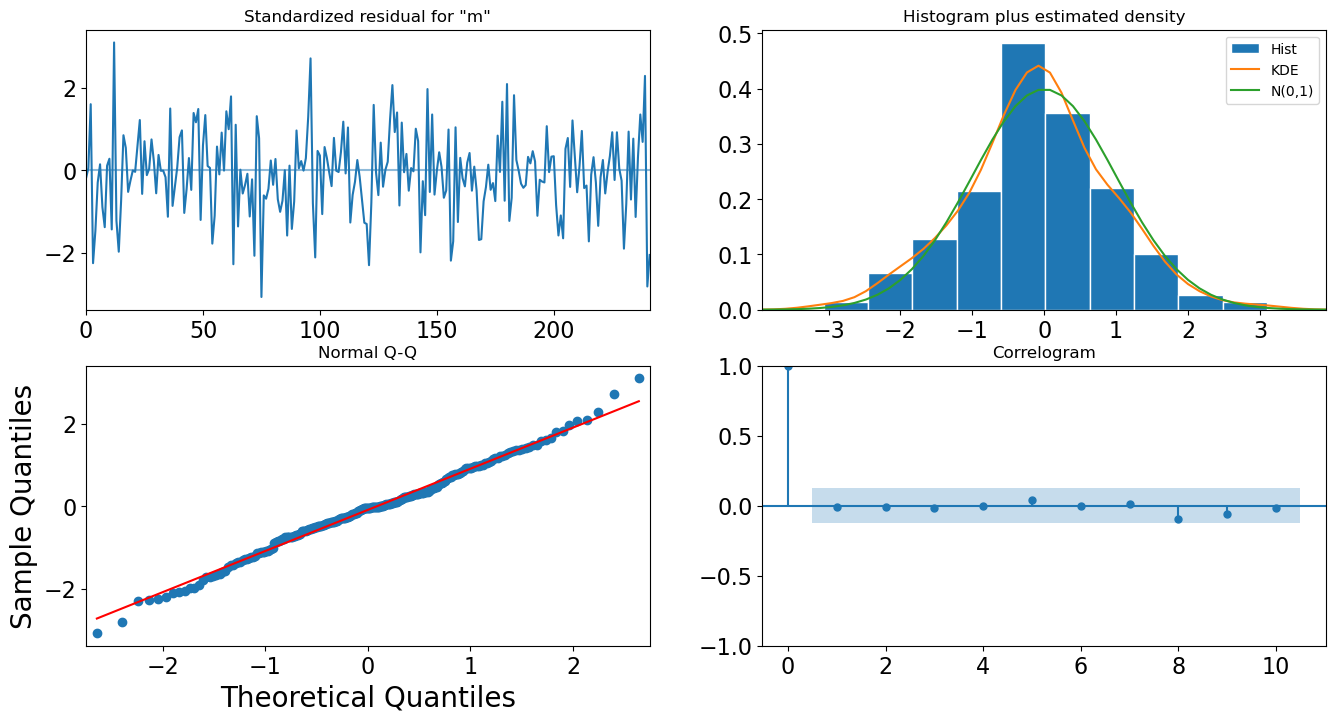

In [57]:
results.plot_diagnostics(figsize=(16, 8))
plt.savefig('modeldiagnostics')
plt.show()

1. From the normal Q-Q plot, we can see that we almost have a straight line, which suggest no systematic departure from normality. Also, the correlogram on the bottom right suggests that there is no autocorrelation in the residuals, and so they are effectively white noise.
2. The first plot on the left shows the residuals over time, we dont see any seasonality here. That’s good. The top-right plot shows that kde line (in red) closely follows the N(0,1) line (normal distribution with zero mean and standard deviation of 1) which confirms that the residuals are normally distributed.

To measure the accuracy of forecasts, we compare the prediction values on the test set with its real values.

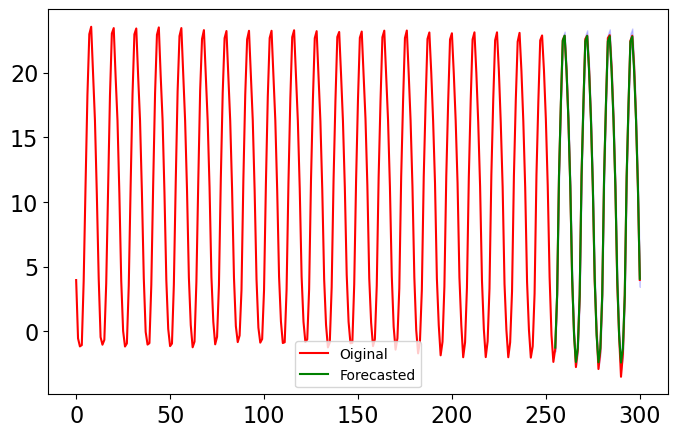

In [58]:
#Checking prediction value with test
forecast = results.get_forecast(steps=len(test))
mean = forecast.predicted_mean
conf_int = forecast.conf_int()
d = mean.index
plt.figure(figsize=(8,5))
# Plot past  levels
plt.plot(max_temp["max_temperature_v"], label='Oiginal', color = 'red')
# Prediction Mean
plt.plot(d, mean, label='Forecasted', color= 'green')
# Shade of space between  confidence intervals
plt.fill_between(d, conf_int.iloc[:,0], conf_int.iloc[:,1],
alpha=0.2, color= 'blue')
# Plot legend
plt.legend()
plt.savefig('p')
plt.show()



In [59]:
from sklearn.metrics import r2_score
print('R2score is',r2_score(test['max_temperature_v'], mean))
mean_absolute_percentage_error = np.mean(np.abs(mean - test['max_temperature_v'])/np.abs(test['max_temperature_v']))
print('MAPE is', mean_absolute_percentage_error)

R2score is 0.9992390615070755
MAPE is 0.7538164528911583


https://en.wikipedia.org/wiki/Mean_absolute_percentage_error